In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
  def __init__(self,in_features=8,h1=64,h2=32,h3=16,out_features=1):
    super(Model,self).__init__()
    self.layers=nn.Sequential(
                              nn.Linear(in_features,h1),
                              nn.ReLU(),
                              nn.Linear(h1,h2),
                              nn.ReLU(),
                              nn.Linear(h2,h3),
                              nn.ReLU(),
                              nn.Linear(h3,out_features),
                              )
  def forward(self,x):
    x=self.layers(x)
    return x

In [ ]:
torch.manual_seed(41)
model=Model()

In [ ]:
 import pandas as pd
 import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/.config/cleaned_data (house price).csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,40,419,2.0,464,1056.0,2.0,1.000000,39.07
1,2,80,317,4.0,2439,2600.0,5.0,3.000000,120.00
2,0,80,1179,3.0,2439,1440.0,2.0,3.000000,62.00
3,3,80,757,3.0,2186,1521.0,3.0,1.000000,95.00
4,3,80,716,2.0,2186,1200.0,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...,...
13067,0,80,1252,5.0,209,3453.0,4.0,0.000000,231.00
13068,3,80,1004,4.0,209,3600.0,5.0,1.584343,400.00
13069,0,80,972,2.0,1216,1141.0,2.0,1.000000,60.00
13070,3,32,907,4.0,2205,4689.0,4.0,1.000000,488.00


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X=X.values
y=y.values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [ ]:
y_train=torch.FloatTensor(y_train).unsqueeze(1)
y_test=torch.FloatTensor(y_test)

In [ ]:
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
epoch=500
losses=[]
for i in range(epoch):
  y_pred=model(X_train)
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i%10==0:
    print(f'Epoch:{i} and loss:{loss.item():.4f}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss:55352.0625
Epoch:10 and loss:35795.3867
Epoch:20 and loss:32485.9336
Epoch:30 and loss:24614.8125
Epoch:40 and loss:18380.1855
Epoch:50 and loss:17802.8359
Epoch:60 and loss:16761.2188
Epoch:70 and loss:16304.6748
Epoch:80 and loss:15977.3594
Epoch:90 and loss:15793.9785
Epoch:100 and loss:15655.0840
Epoch:110 and loss:15527.6348
Epoch:120 and loss:15398.0146
Epoch:130 and loss:15263.7861
Epoch:140 and loss:15133.7051
Epoch:150 and loss:15007.7646
Epoch:160 and loss:14882.3057
Epoch:170 and loss:14762.2793
Epoch:180 and loss:14644.3994
Epoch:190 and loss:14522.7783
Epoch:200 and loss:14398.1943
Epoch:210 and loss:14271.0977
Epoch:220 and loss:14137.0625
Epoch:230 and loss:13985.6553
Epoch:240 and loss:13818.7676
Epoch:250 and loss:13649.9434
Epoch:260 and loss:13474.3594
Epoch:270 and loss:13292.2832
Epoch:280 and loss:13099.7031
Epoch:290 and loss:12914.7959
Epoch:300 and loss:12743.9951
Epoch:310 and loss:12582.0977
Epoch:320 and loss:12432.9873
Epoch:330 and loss:12

Text(0.5, 0, 'Epoch')

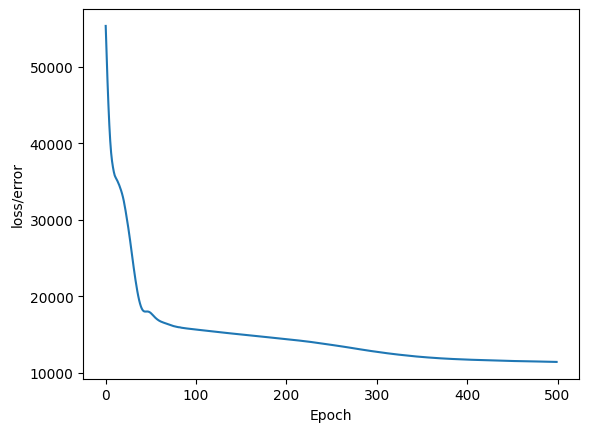

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epoch),losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')